<a href="https://colab.research.google.com/github/sftSalman/CNN/blob/main/CNN_Step_by_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def zero_pad(X,pad):
#pad = np.pad(X,((0,0),(pad,pad),(pad,pad)(0,0)),'constant', constant_values =(0,0))
  X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = (0,0))
  return X_pad

In [5]:
x = np.random.randn(4,3,3,2)
x_pad = zero_pad(x,2)
print(x.shape)
print(x_pad.shape)

(4, 3, 3, 2)
(4, 7, 7, 2)


In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

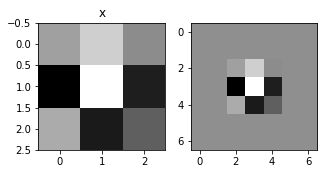

In [11]:
fig , ax = plt.subplots(1,2)
ax[0].set_title('x')
ax[0].imshow(x[0,:,:,0])
ax[1].imshow(x_pad[0,:,:,0])

In [12]:
print('hi')

hi
